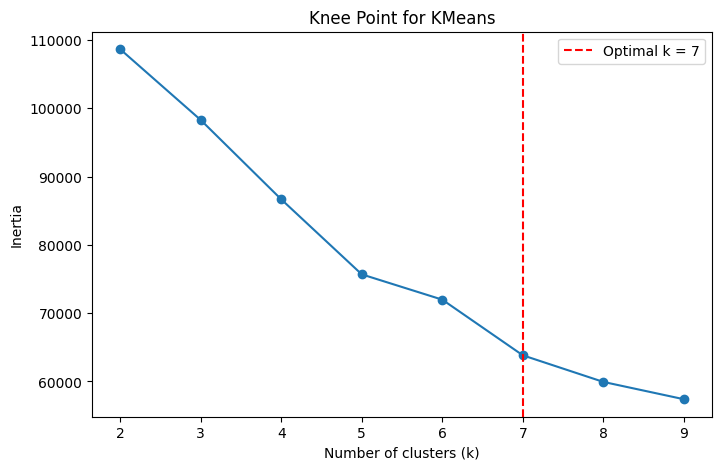

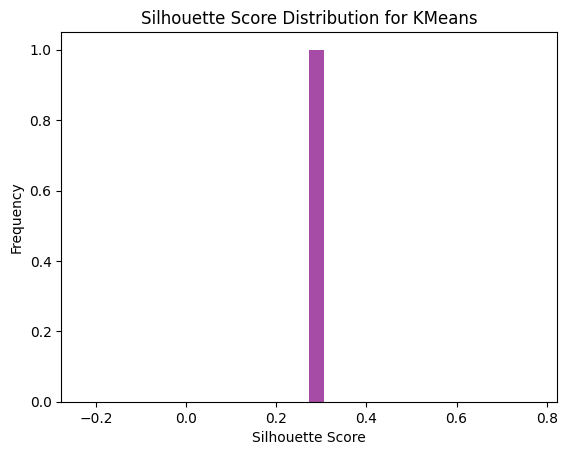

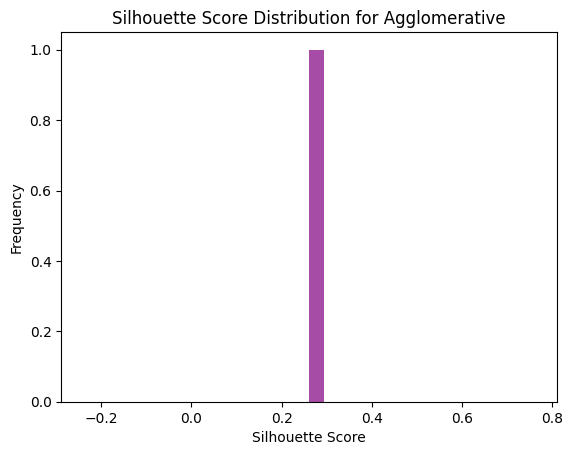

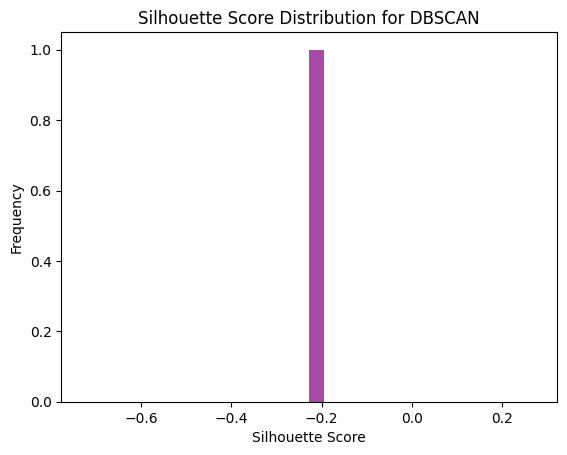

           Model  Silhouette Score  Calinski-Harabasz Score  \
0         KMeans          0.273265              1773.061289   
1  Agglomerative          0.261456              1730.662062   
2         DBSCAN         -0.227119                15.308951   

   Davies-Bouldin Score  
0              1.573623  
1              1.344083  
2              1.775392  
Kesimpulan:
Model terbaik dipilih berdasarkan nilai matriks evaluasi berikut:
- Nilai Silhouette Score yang lebih tinggi menunjukkan kualitas clustering yang lebih baik.
- Nilai Calinski-Harabasz Score yang lebih tinggi menunjukkan kualitas clustering yang lebih baik.
- Nilai Davies-Bouldin Score yang lebih rendah menunjukkan kualitas clustering yang lebih baik.
Model terbaik berdasarkan Silhouette Score adalah KMeans dengan skor 0.27326467671088744.


In [2]:
!pip install kneed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# Load dataset
data = pd.read_csv('clusteringweek06.csv')

# Preprocess data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define clustering models
kmeans = KMeans()
agglomerative = AgglomerativeClustering()
dbscan = DBSCAN()

# Lists to store evaluation metrics
models = [kmeans, agglomerative, dbscan]
model_names = ['KMeans', 'Agglomerative', 'DBSCAN']
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Knee point detection for KMeans
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia and find knee point
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Knee Point for KMeans')
kneedle = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()

# Evaluate each model and calculate metrics
for model, name in zip(models, model_names):
    # Set parameters for KMeans and Agglomerative
    if name == 'KMeans':
        model = KMeans(n_clusters=optimal_k, random_state=42)
    elif name == 'Agglomerative':
        model = AgglomerativeClustering(n_clusters=optimal_k)

    # Fit and predict clusters
    clusters = model.fit_predict(data_scaled)

    # Calculate Silhouette Score (only if more than 1 cluster is created)
    if len(np.unique(clusters)) > 1:
        silhouette = silhouette_score(data_scaled, clusters)
    else:
        silhouette = np.nan

    # Calculate Calinski-Harabasz and Davies-Bouldin scores
    calinski_harabasz = calinski_harabasz_score(data_scaled, clusters)
    davies_bouldin = davies_bouldin_score(data_scaled, clusters)

    # Append to lists
    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)

    # Print silhouette plot for each model
    plt.figure()
    plt.hist(silhouette, bins=30, color='purple', alpha=0.7)
    plt.xlabel("Silhouette Score")
    plt.ylabel("Frequency")
    plt.title(f"Silhouette Score Distribution for {name}")
    plt.show()

# Show results in DataFrame for easy comparison
results = pd.DataFrame({
    'Model': model_names,
    'Silhouette Score': silhouette_scores,
    'Calinski-Harabasz Score': calinski_harabasz_scores,
    'Davies-Bouldin Score': davies_bouldin_scores
})
print(results)

# Kesimpulan
print("Kesimpulan:")
print("Model terbaik dipilih berdasarkan nilai matriks evaluasi berikut:")
print("- Nilai Silhouette Score yang lebih tinggi menunjukkan kualitas clustering yang lebih baik.")
print("- Nilai Calinski-Harabasz Score yang lebih tinggi menunjukkan kualitas clustering yang lebih baik.")
print("- Nilai Davies-Bouldin Score yang lebih rendah menunjukkan kualitas clustering yang lebih baik.")
best_model_idx = results['Silhouette Score'].idxmax()
print(f"Model terbaik berdasarkan Silhouette Score adalah {results['Model'][best_model_idx]} dengan skor {results['Silhouette Score'][best_model_idx]}.")
